In [1]:
%matplotlib inline
import os, sys, inspect, warnings
curr_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
main_dir = '/'.join(curr_dir.split('/')[:-1])
sub_dir = os.path.join(main_dir, 'RGCPD/')
# core_pp = os.path.join(main_dir, 'RGCPD/core')
if main_dir not in sys.path:
    sys.path.append(main_dir)
    sys.path.append(sub_dir)
print(sys.path)
import numpy as np 
from collections import Counter
# import statsmodels.api as sm 
import pandas as pd 
import math
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import itertools as it
import pywt as wv
from scipy.fftpack import fft
from copy import deepcopy
# from statsmodels.tsa.arima_process import  arma_generate_sample, ArmaProcess
from pprint import pprint as pp 
from pandas.plotting import register_matplotlib_converters
from RGCPD import RGCPD
from RGCPD import BivariateMI
import core_pp
import plot_signal_decomp
import plot_coeffs
from visualize_cwt import *
register_matplotlib_converters()
np.random.seed(12345)
plt.style.use('seaborn')

['/mnt/c/Users/prixn/.vscode/extensions/ms-vscode-remote.remote-wsl-0.44.4', '/home/jier/.vscode-server/extensions/ms-python.python-2020.7.94776/pythonFiles', '/home/jier/.vscode-server/extensions/ms-python.python-2020.7.94776/pythonFiles/lib/python', '/home/jier/miniconda3/envs/RGCPD/lib/python37.zip', '/home/jier/miniconda3/envs/RGCPD/lib/python3.7', '/home/jier/miniconda3/envs/RGCPD/lib/python3.7/lib-dynload', '', '/home/jier/miniconda3/envs/RGCPD/lib/python3.7/site-packages', '/home/jier/miniconda3/envs/RGCPD/lib/python3.7/site-packages/tigramite-4.1.0-py3.7-linux-x86_64.egg', '/home/jier/miniconda3/envs/RGCPD/lib/python3.7/site-packages/timesynth-0.2.4-py3.7.egg', '/home/jier/miniconda3/envs/RGCPD/lib/python3.7/site-packages/jitcxde_common-1.4.1-py3.7.egg', '/home/jier/miniconda3/envs/RGCPD/lib/python3.7/site-packages/jitcdde-1.4.0-py3.7.egg', '/home/jier/miniconda3/envs/RGCPD/lib/python3.7/site-packages/symengine-0.4.0-py3.7-linux-x86_64.egg', '/home/jier/miniconda3/envs/RGCPD/li

ModuleNotFoundError: No module named 'RGCPD'

In [2]:
path_data = os.path.join(main_dir, 'data')
# temporal_data  = os.path.join(main_dir, 'data/Ftemporal')
current_analysis_path = os.path.join(main_dir, 'Jier_analysis')
target= 3
target_path = os.path.join(path_data, 'tf5_nc5_dendo_80d77.nc')
precursor_path = os.path.join(path_data,'sm2_1979-2018_1_12_daily_1.0deg.nc')
list_of_name_path = [(target, target_path), 
                    ('sm', precursor_path )]
list_for_MI = [BivariateMI(name='sm', func=BivariateMI.corr_map, 
                          kwrgs_func={'alpha':.0001, 'FDR_control':True}, 
                          distance_eps=700, min_area_in_degrees2=5)]
rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           start_end_TVdate=('06-01', '08-31'),
           path_outmain=os.path.join(main_dir,'data'))

In [3]:
rg.pp_precursors(detrend=True, anomaly=True, selbox=None)
rg.pp_TV()
rg.traintest(method='no_train_test_split')
rg.calc_corr_maps()
rg.cluster_list_MI()
rg.get_ts_prec(precur_aggr=1)


Loaded pre-processed data of sm

original tfreq of imported response variable is converted to desired tfreq 10
Daily input freq
31may-29aug_
No train test split

swvl2 - calculating correlation maps
Progress traintest set 100%, trainsize=(400dp, 100%)

redefine target variable on 1 day means
Selecting subset as defined by start_end_date
Daily input freq
No train test split

Getting MI timeseries
There are [2] regions in total (list of different splits)


In [4]:
rg.dates_TV

DatetimeIndex(['1979-06-01', '1979-06-02', '1979-06-03', '1979-06-04',
               '1979-06-05', '1979-06-06', '1979-06-07', '1979-06-08',
               '1979-06-09', '1979-06-10',
               ...
               '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25',
               '2018-08-26', '2018-08-27', '2018-08-28', '2018-08-29',
               '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', length=3680, freq=None)

Progress causal inference - traintest set 100%

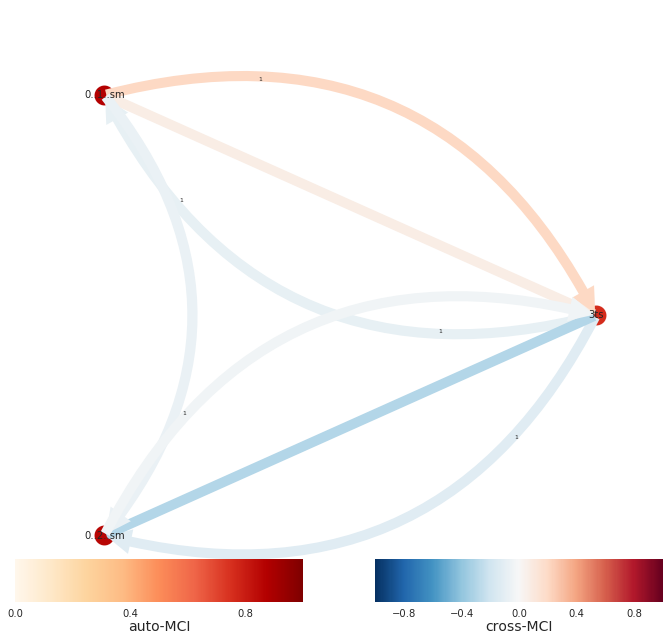

In [5]:
rg.PCMCI_df_data()
rg.PCMCI_get_links()
rg.df_MCIc
rg.PCMCI_plot_graph()

In [6]:
rg_data  = rg.df_data[['3ts', '0..1..sm', '0..2..sm']]
rg_data = rg_data.rename(columns={'0..1..sm':'prec1', '0..2..sm':'prec2'})
rg_index = rg_data.index.levels[1]
prec1 = rg_data['prec1'].values
prec2 = rg_data['prec2'].values
target = rg_data['3ts'].values
wave  = wv.Wavelet('db4')
mode=wv.Modes.periodic

In [7]:
print(len(prec1), len(prec1)/2)

14600 7300.0


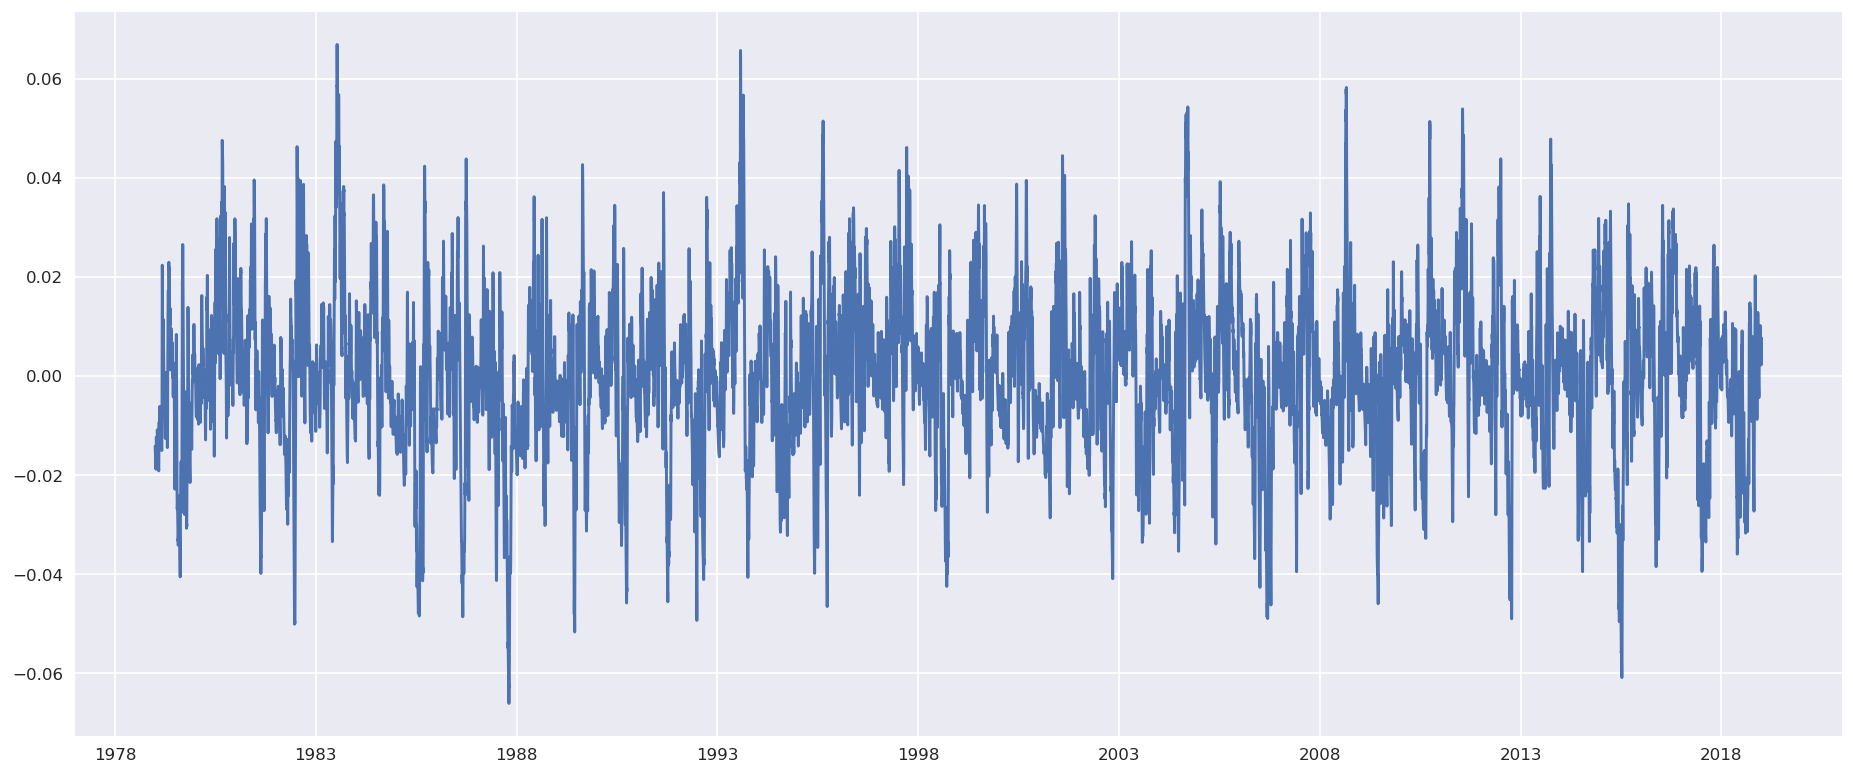

In [8]:
plt.figure(figsize=(19,8), dpi=120)
plt.plot(rg_index, prec1)
plt.show()

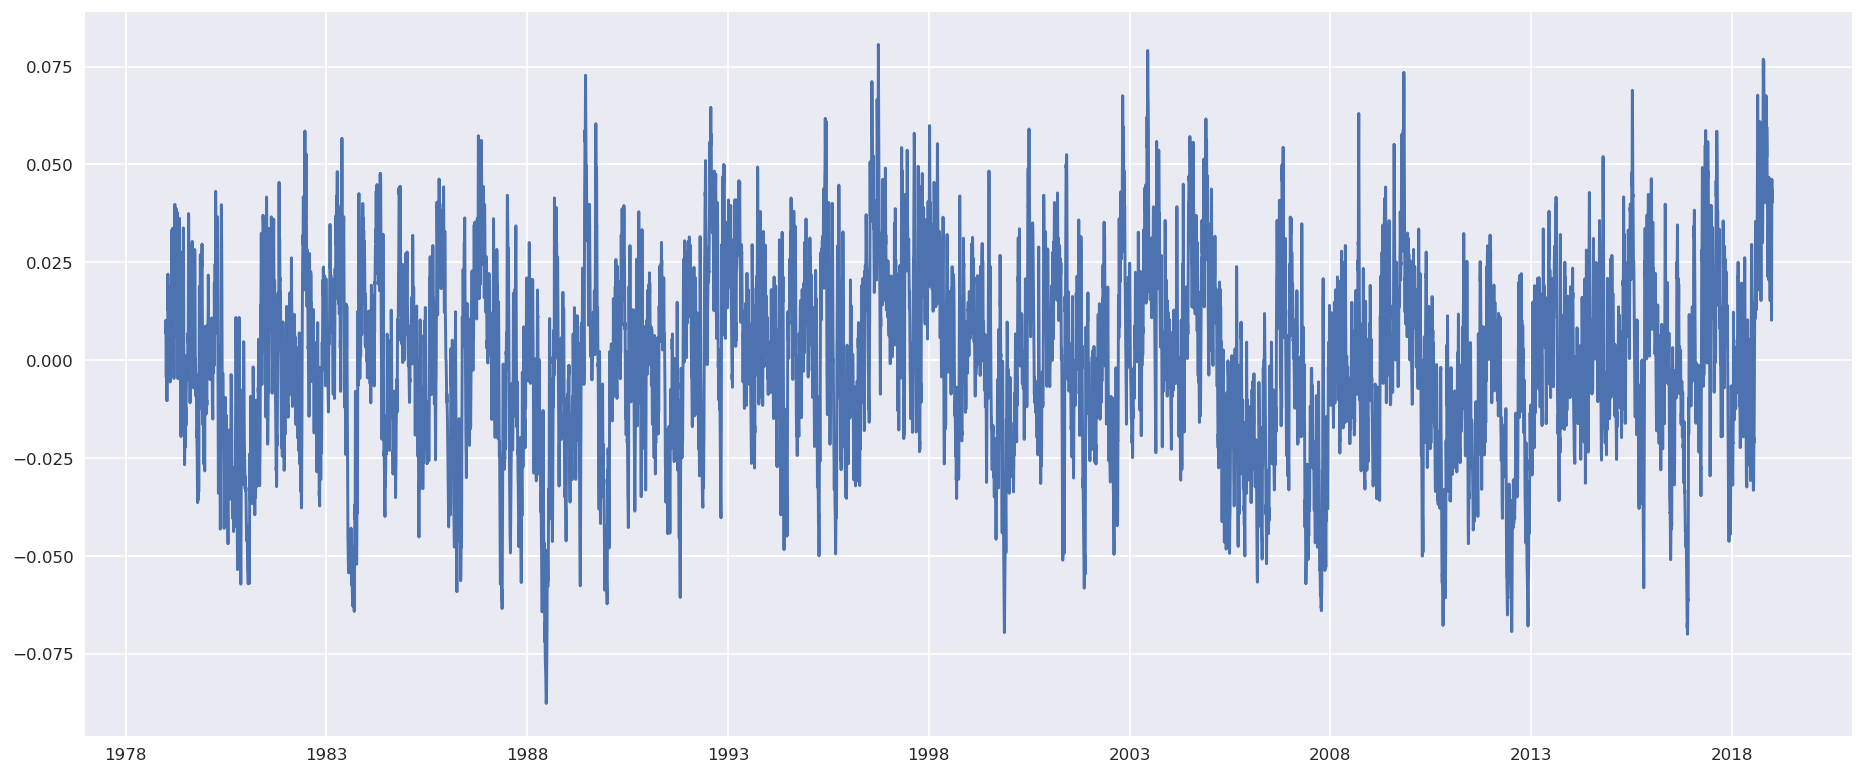

In [9]:
plt.figure(figsize=(19,8), dpi=120)
plt.plot(rg_index, prec2)
plt.show()

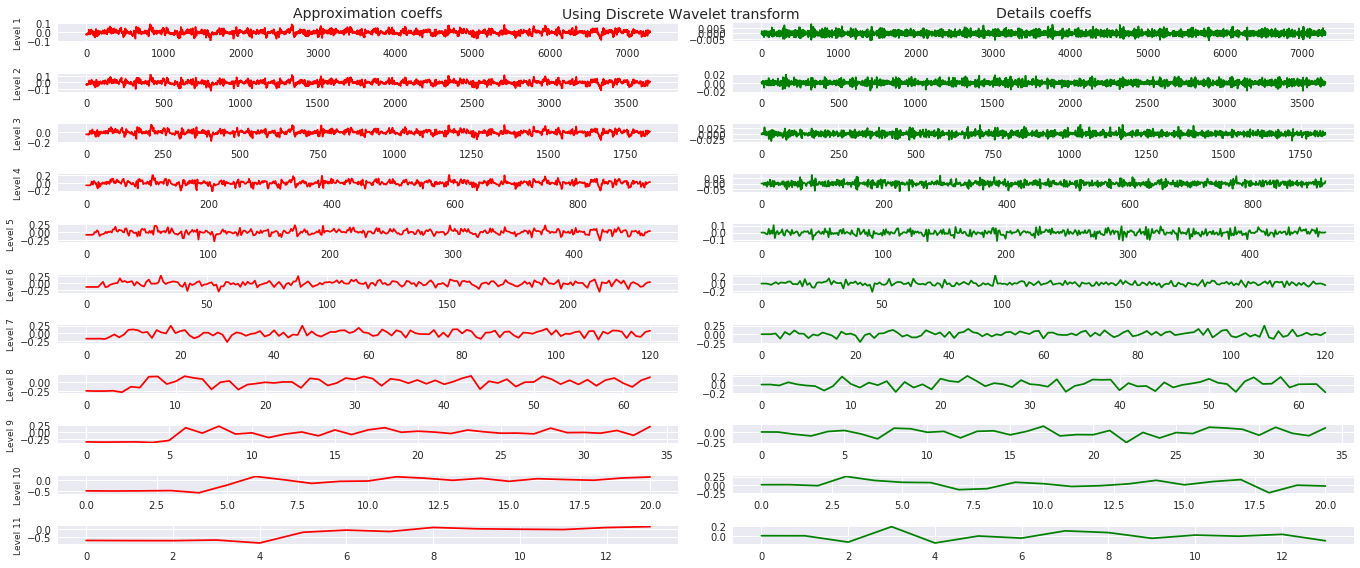

In [10]:

fig, ax = plt.subplots(wv.dwt_max_level(len(prec1), wave.dec_len), 2, figsize=(19, 8))
fig.suptitle('Using Discrete Wavelet transform', fontsize=14)
ap = rg_data['prec1'].values
for i in range(wv.dwt_max_level(len(prec1), wave.dec_len)):
   ap, det =  wv.dwt(ap, 'db4')
   ax[i, 0].plot(ap, 'r')
   ax[i, 1].plot(det, 'g')
   ax[i, 0].set_ylabel('Level {}'.format(i + 1), fontsize=9, rotation=90)
   if i == 0:
        ax[i, 0].set_title('Approximation coeffs', fontsize=14)
        ax[i, 1].set_title('Details coeffs', fontsize=14)
plt.tight_layout()
plt.show()

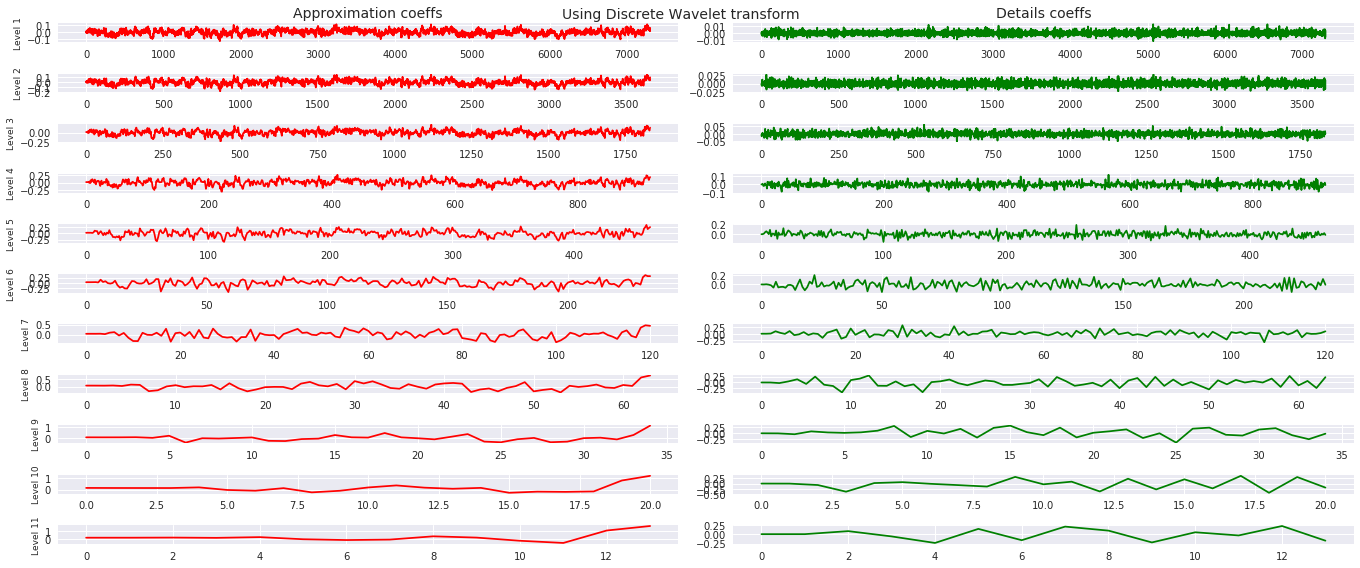

In [11]:

fig, ax = plt.subplots(wv.dwt_max_level(len(prec2), wave.dec_len), 2, figsize=(19, 8))
fig.suptitle('Using Discrete Wavelet transform', fontsize=14)
ap = rg_data['prec2'].values
for i in range(wv.dwt_max_level(len(prec2), wave.dec_len)):
   ap, det =  wv.dwt(ap, 'db4')
   ax[i, 0].plot(ap, 'r')
   ax[i, 1].plot(det, 'g')
   ax[i, 0].set_ylabel('Level {}'.format(i + 1), fontsize=9, rotation=90)
   if i == 0:
        ax[i, 0].set_title('Approximation coeffs', fontsize=14)
        ax[i, 1].set_title('Details coeffs', fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
# Using recursion we obtain all of our approximation coefficients with just dwt
s_prec1 = prec1
cA = []

for i in range(6): # Using recursion to overwrite signal to go level deepeer
   s_prec1, det =  wv.dwt(s_prec1, wave , mode=mode)
   print('Len Sign ', len(s_prec1), 'Lenght detail ', len(det))
   cA.append(s_prec1)

print('Inspecting approximations length')
for i, c in enumerate(cA):
    print(i+1, len(c))

Len Sign  7303 Lenght detail  7303
Len Sign  3655 Lenght detail  3655
Len Sign  1831 Lenght detail  1831
Len Sign  919 Lenght detail  919
Len Sign  463 Lenght detail  463
Len Sign  235 Lenght detail  235
Inspecting approximations length
1 7303
2 3655
3 1831
4 919
5 463
6 235


In [13]:
s_target = target
cA_t= []
# wv.dwt_max_level(len(s_target), wave.dec_len)
for i in range(6): # Using recursion to overwrite signal to go level deepeer
   s_target, det =  wv.dwt(s_target, wave , mode=mode)
   print('Len Sign ', len(s_target), 'Lenght detail ', len(det))
   cA_t.append(s_target)

print('Inspecting approximations length')
for i, c in enumerate(cA_t):
    print(i, len(c))

Len Sign  7303 Lenght detail  7303
Len Sign  3655 Lenght detail  3655
Len Sign  1831 Lenght detail  1831
Len Sign  919 Lenght detail  919
Len Sign  463 Lenght detail  463
Len Sign  235 Lenght detail  235
Inspecting approximations length
0 7303
1 3655
2 1831
3 919
4 463
5 235


Progress causal inference - traintest set 100%

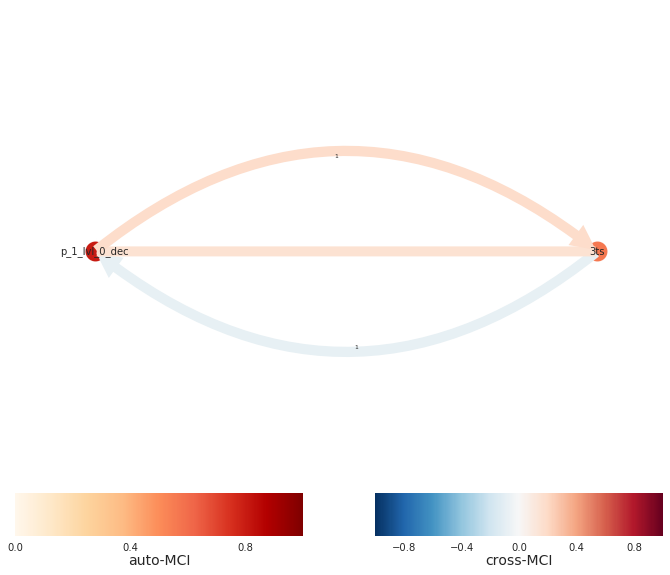

Progress causal inference - traintest set 100%

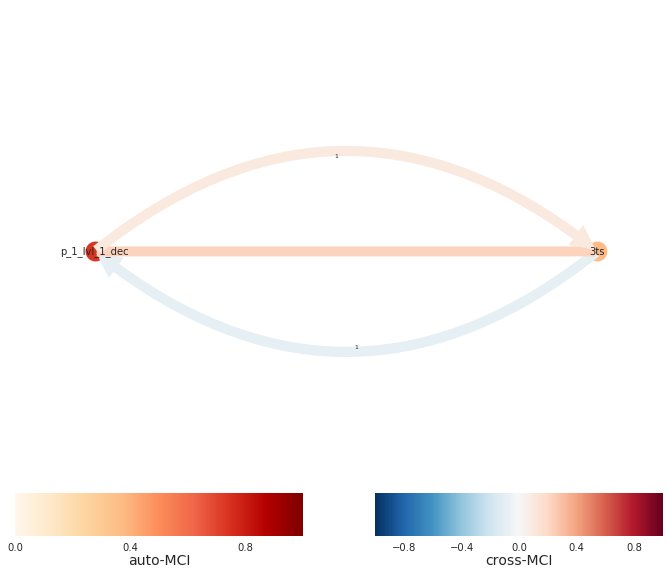

Progress causal inference - traintest set 100%

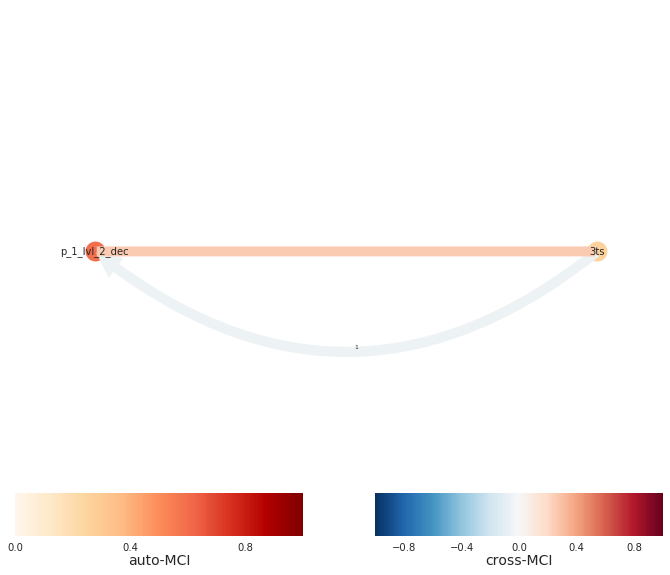

Progress causal inference - traintest set 100%

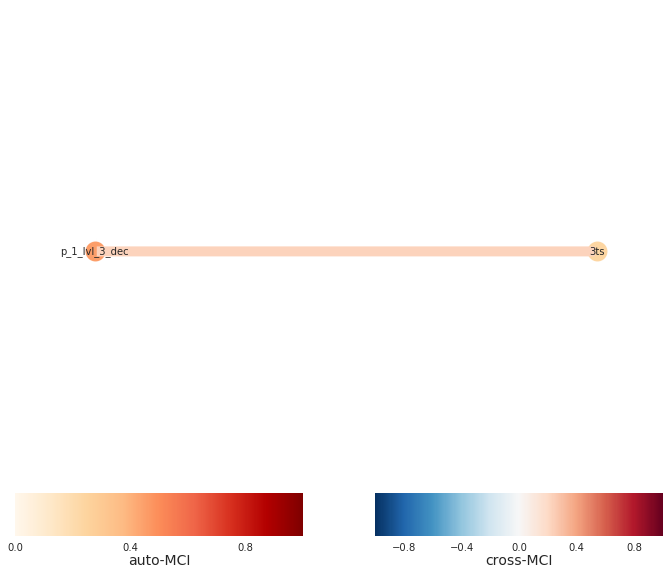

Progress causal inference - traintest set 100%

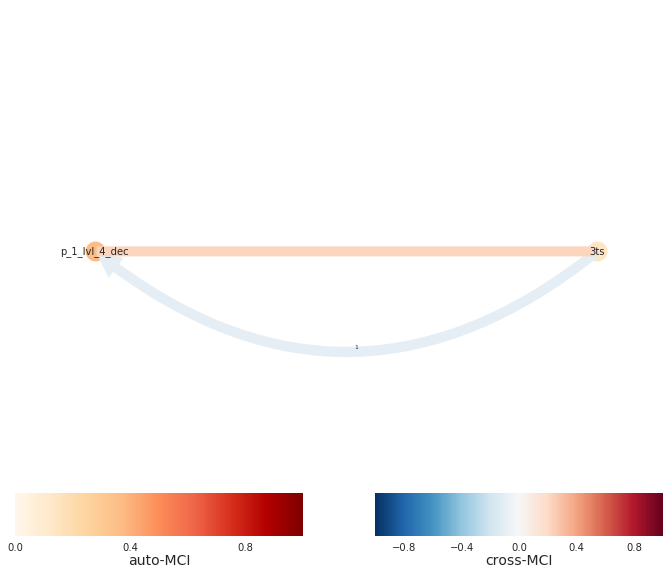

Progress causal inference - traintest set 100%

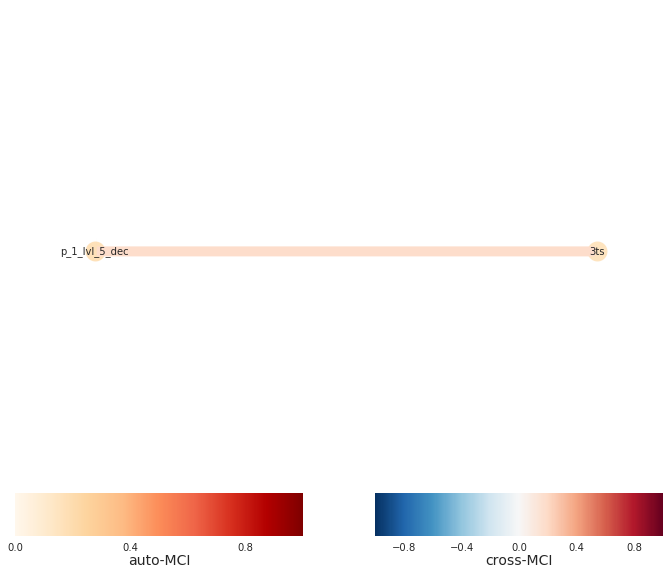

In [14]:
obj_rgcpd = []
for i in range(0,len(cA)):    
    idx_lvl_t = pd.DatetimeIndex(pd.date_range(rg_index[0] ,end=rg_index[-1], periods=len(cA_t[i]) ).strftime('%Y-%m-%d') )
    idx_prec = pd.DatetimeIndex(pd.date_range(rg_index[0], rg_index[-1], periods=len(cA[i]) ).strftime('%Y-%m-%d') )
    dates = core_pp.get_subdates(dates=idx_lvl_t, start_end_date=('06-01', '08-31'), start_end_year=None, lpyr=False)
    full_time  = idx_lvl_t
    RV_time  = dates
    RV_mask = pd.Series(np.array([True if d in RV_time else False for d in full_time]), index=pd.MultiIndex.from_product(([0], idx_lvl_t)), name='RV_mask')
    trainIsTrue = pd.Series(np.array([True for _ in range(len(cA_t[i]))]), index=pd.MultiIndex.from_product(([0], idx_lvl_t)), name='TrainIsTrue')
    ts_ca1 = pd.Series(cA[i], index=pd.MultiIndex.from_product(([0], idx_prec)),name='p_1_lvl_'+ str(i)+'_dec')
    # ts_ca2= pd.Series(cA_2[i], index=pd.MultiIndex.from_product(([0], idx_prec)), name='p_2_lvl_'+str(i)+'_dec')
    ts_tca1 = pd.Series(cA_t[i], index=pd.MultiIndex.from_product(([0],idx_lvl_t)), name='3ts')
    df = pd.concat([ts_tca1, ts_ca1, trainIsTrue, RV_mask], axis=1)
    rg.df_data = df
    rg.PCMCI_df_data()
    rg.PCMCI_get_links()
    rg.df_MCIc
    obj_rgcpd.append(deepcopy(rg.df_MCIc))
    rg.PCMCI_plot_graph()

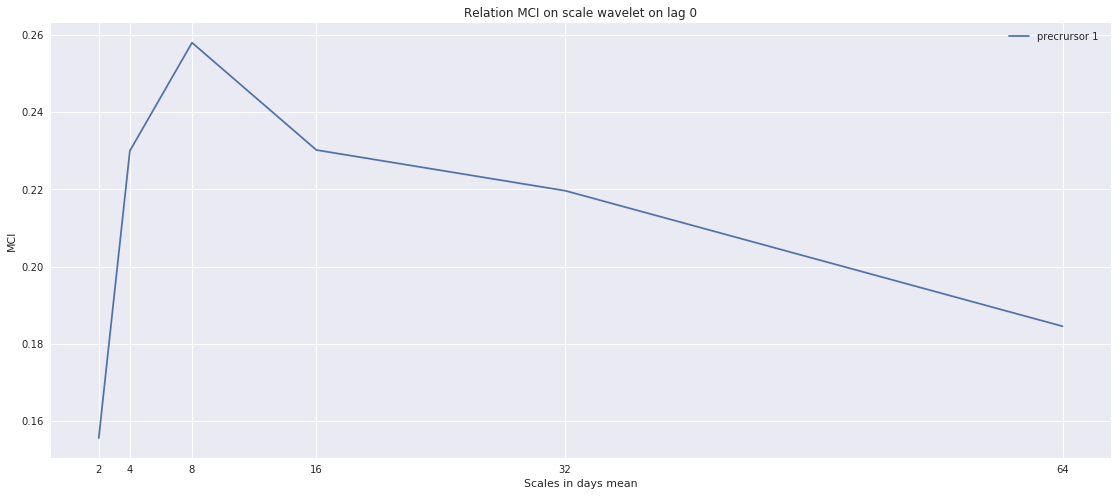

In [15]:
x_as = np.arange(1, len(cA)+1)
x_as = np.exp2(x_as)
lag_0_1 = [lags.values[:,0][1] for _, lags in enumerate(obj_rgcpd)]

plt.figure(figsize=(19,8))
# plt.plot(x_as, lag_0_t, label='target ')
plt.plot(x_as, lag_0_1, label='precrursor 1 ')
plt.xticks(x_as)
plt.title('Relation MCI on scale wavelet on lag 0')
plt.xlabel('Scales in days mean')
plt.ylabel('MCI')
plt.legend(loc=0)
plt.show()

In [16]:
# Using recursion we obtain all of our approximation coefficients with just dwt
s_prec2 = prec2
cA2 = []
# wv.dwt_max_level(len(s_prec2), wave.dec_len)
for i in range(6): # Using recursion to overwrite signal to go level deepeer
   s_prec2, det =  wv.dwt(s_prec2, wave , mode=mode)
   print('Len Sign ', len(s_prec2), 'Lenght detail ', len(det))
   cA2.append(s_prec2)

print('Inspecting approximations length')
for i, c in enumerate(cA2):
    print(i, len(c))

Len Sign  7303 Lenght detail  7303
Len Sign  3655 Lenght detail  3655
Len Sign  1831 Lenght detail  1831
Len Sign  919 Lenght detail  919
Len Sign  463 Lenght detail  463
Len Sign  235 Lenght detail  235
Inspecting approximations length
0 7303
1 3655
2 1831
3 919
4 463
5 235


Progress causal inference - traintest set 100%

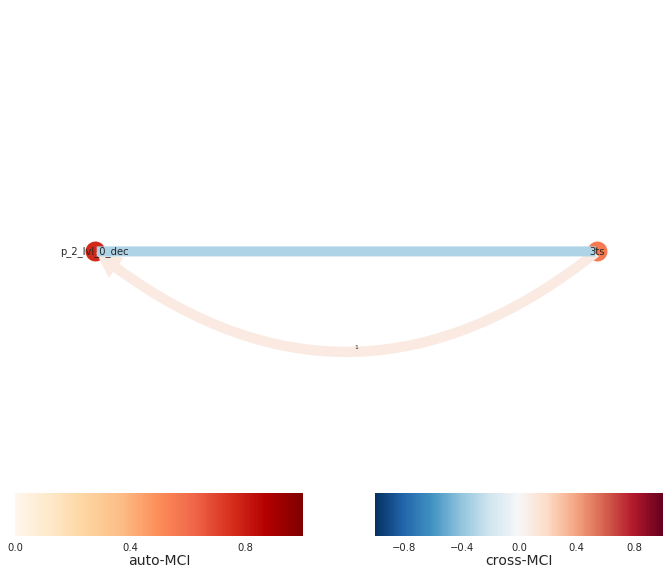

Progress causal inference - traintest set 100%

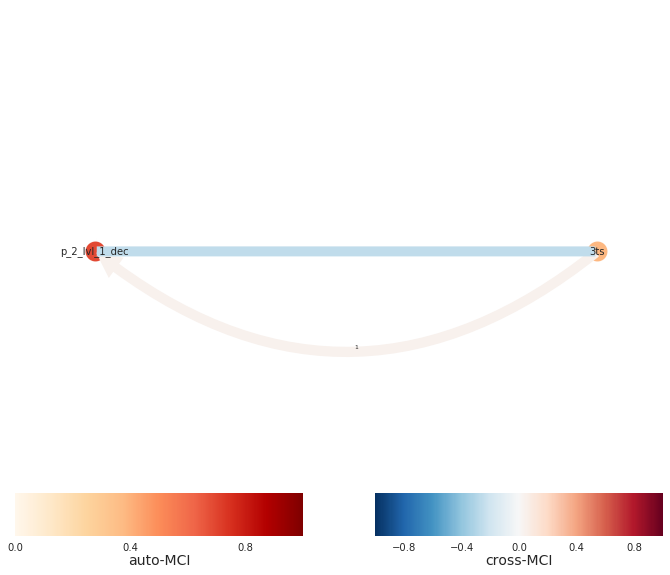

Progress causal inference - traintest set 100%

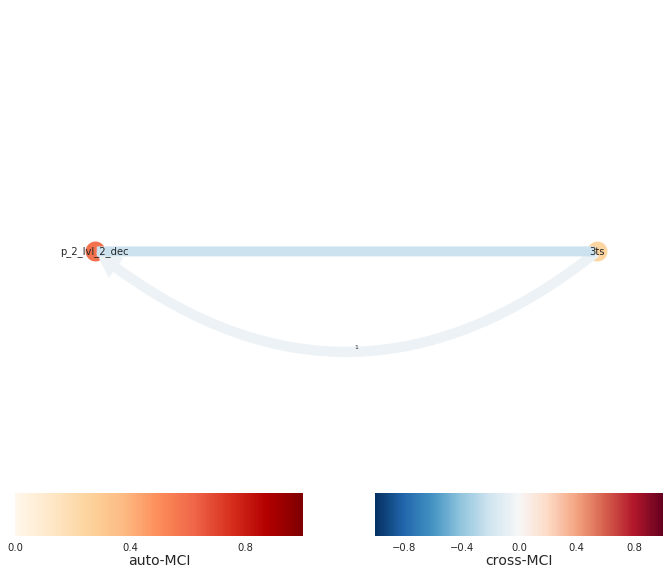

Progress causal inference - traintest set 100%

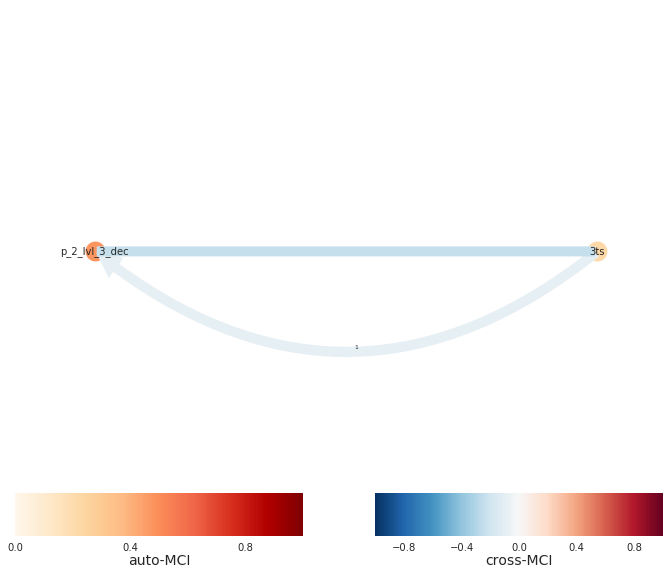

Progress causal inference - traintest set 100%

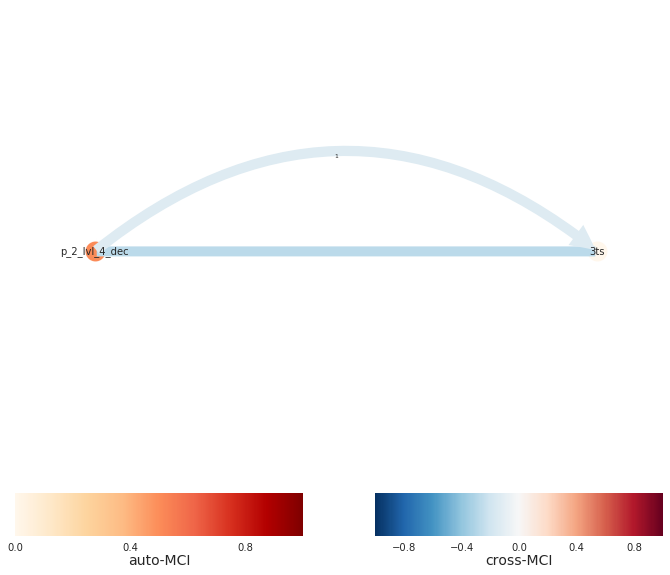

Progress causal inference - traintest set 100%

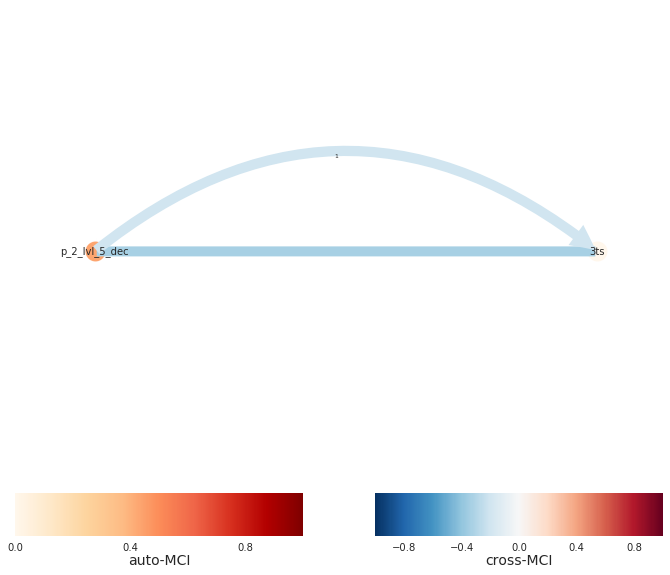

In [17]:
obj_rgcpd2 = []
for i in range(0,len(cA2)):    
    idx_lvl_t = pd.DatetimeIndex(pd.date_range(rg_index[0] ,end=rg_index[-1], periods=len(cA_t[i]) ).strftime('%Y-%m-%d') )
    idx_prec = pd.DatetimeIndex(pd.date_range(rg_index[0], rg_index[-1], periods=len(cA2[i]) ).strftime('%Y-%m-%d') )
    dates = core_pp.get_subdates(dates=idx_lvl_t, start_end_date=('06-01', '08-31'), start_end_year=None, lpyr=False)

    full_time  = idx_lvl_t
    RV_time  = dates
    RV_mask = pd.Series(np.array([True if d in RV_time else False for d in full_time]), index=pd.MultiIndex.from_product(([0], idx_lvl_t)), name='RV_mask')

    trainIsTrue = pd.Series(np.array([True for _ in range(len(cA_t[i]))]), index=pd.MultiIndex.from_product(([0], idx_lvl_t)), name='TrainIsTrue')
    ts_ca2= pd.Series(cA2[i], index=pd.MultiIndex.from_product(([0], idx_prec)), name='p_2_lvl_'+str(i)+'_dec')
    ts_tca1 = pd.Series(cA_t[i], index=pd.MultiIndex.from_product(([0],idx_lvl_t)), name='3ts')

    # df = pd.concat([ts_tca1.reset_index(drop=True), ts_ca2.reset_index(drop=True), trainIsTrue.reset_index(drop=True), RV_mask.reset_index(drop=True)], axis=1)
    df  = pd.concat([ts_tca1, ts_ca2, trainIsTrue, RV_mask], axis=1)

    rg.df_data = df
    rg.PCMCI_df_data()
    rg.PCMCI_get_links()
    rg.df_MCIc
    obj_rgcpd2.append(deepcopy(rg.df_MCIc))
    rg.PCMCI_plot_graph()

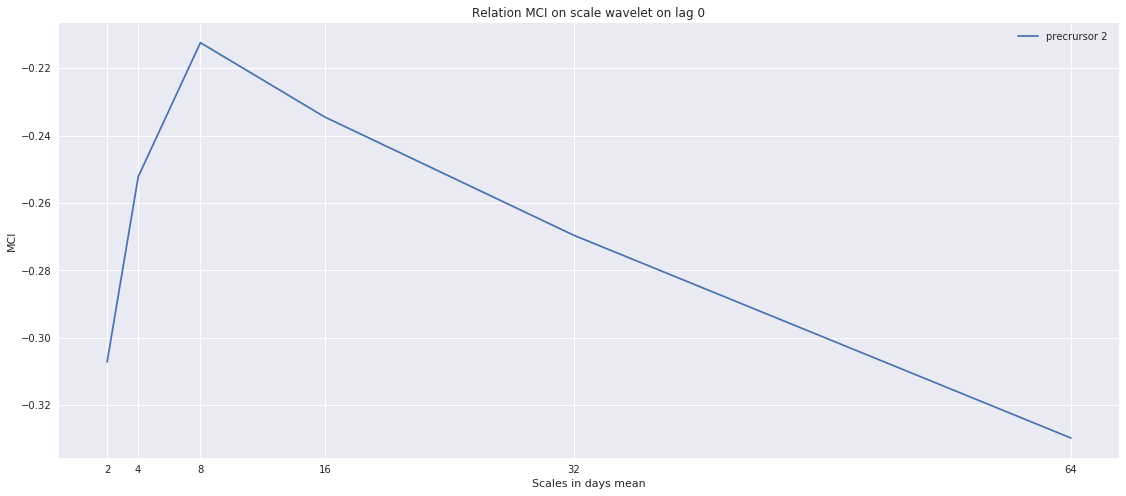

In [18]:
x_as = np.arange(1, len(cA2)+1)
x_as = np.exp2(x_as)
lag_0_1 = [lags.values[:,0][1] for _, lags in enumerate(obj_rgcpd2)]

plt.figure(figsize=(19,8))
# plt.plot(x_as, lag_0_t, label='target ')
plt.plot(x_as, lag_0_1, label='precrursor 2 ')
plt.xticks(x_as)
plt.title('Relation MCI on scale wavelet on lag 0')
plt.xlabel('Scales in days mean')
plt.ylabel('MCI')
plt.legend(loc=0)
plt.show()
